Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **1. Perkenalan Dataset**


The Ship Performance Dataset is a synthetic yet realistic collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea.</br> 
**Dataset Features**
The dataset consists of 2736 rows and 18 columns, with features categorized into numerical and categorical types. Below are some key highlights:

**Numerical Features**
- Speed_Over_Ground_knots: Average speed of the ship over water (in knots).
- Engine_Power_kW: Engine power output (in kilowatts).
- Distance_Traveled_nm: Total distance traveled by the ship (in nautical miles).
- Operational_Cost_USD: Total operational cost per voyage (in USD).
- Revenue_per_Voyage_USD: Revenue generated per voyage (in USD).
- Efficiency_nm_per_kWh: Energy efficiency calculated in nautical miles per kilowatt-hour.
- Draft_Meters
- Cargo_weight_tons
- Seasonal_Impact_Score
- Turnaround_Time_hours
- Weekly_Voyage_Count
- Average_Load_Percentage

**Categorical Features**
- Ship_Type: Type of ship (e.g., Tanker, Container Ship, Fish Carrier, Bulk Carrier).
- Route_Type: Shipping route type (e.g., Short-haul, Long-haul, Transoceanic).
- Engine_Type: Type of engine (e.g., Diesel, Heavy Fuel Oil).
- Maintenance_Status: Maintenance condition of the ship (e.g., Fair, Critical, Good).
- Weather_Condition: Prevailing weather conditions during voyages (e.g., Calm, Moderate, Rough).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import llibrary yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Load data
df = pd.read_csv('Ship_Performance_Dataset.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 1. Memahami struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
# 2.Identifikasi data hilang
df.isna().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [5]:
# 3. Analisis distribusi dan korelasi
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


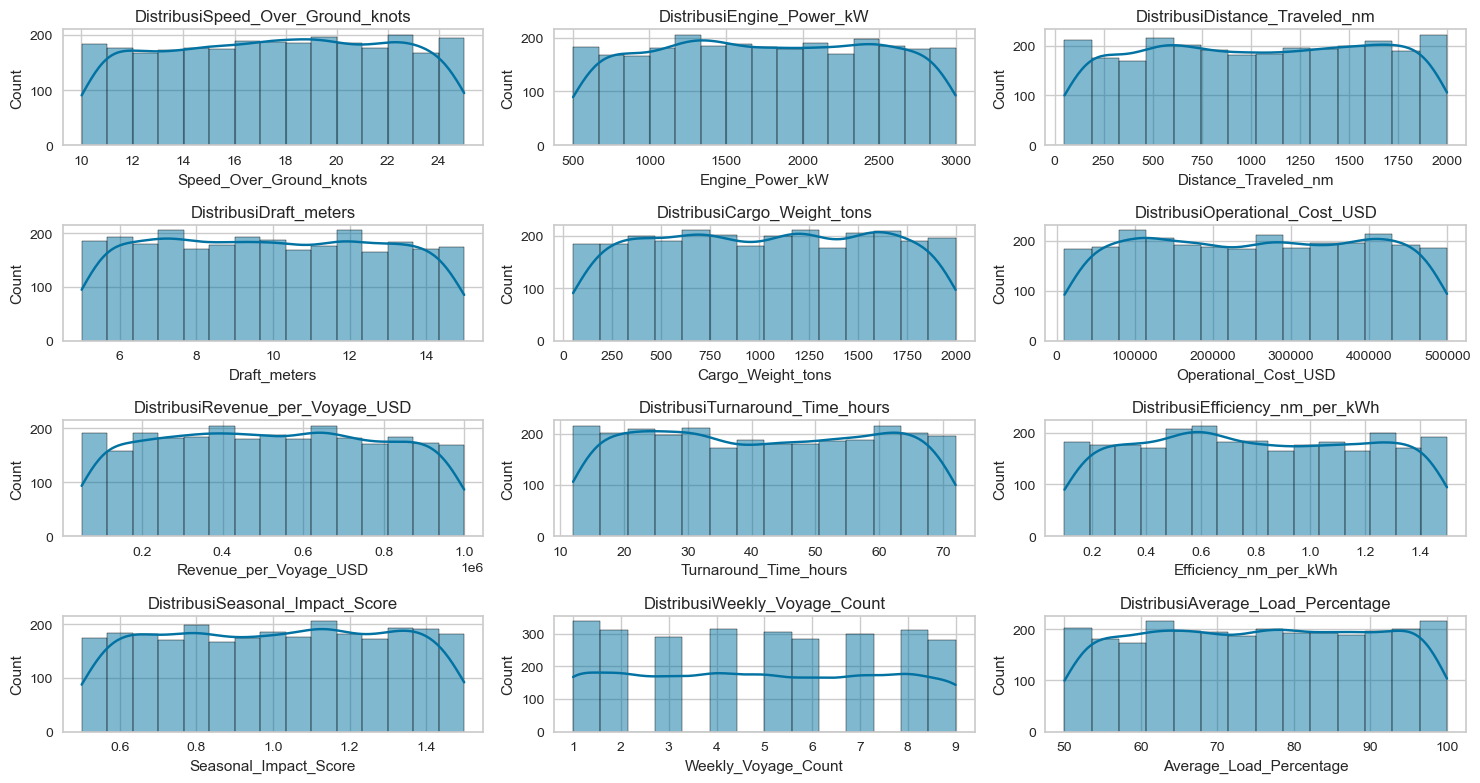

In [6]:
# distribusi kolum numerik
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 3, 3, i) 
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi{col}")
plt.tight_layout()
plt.show()

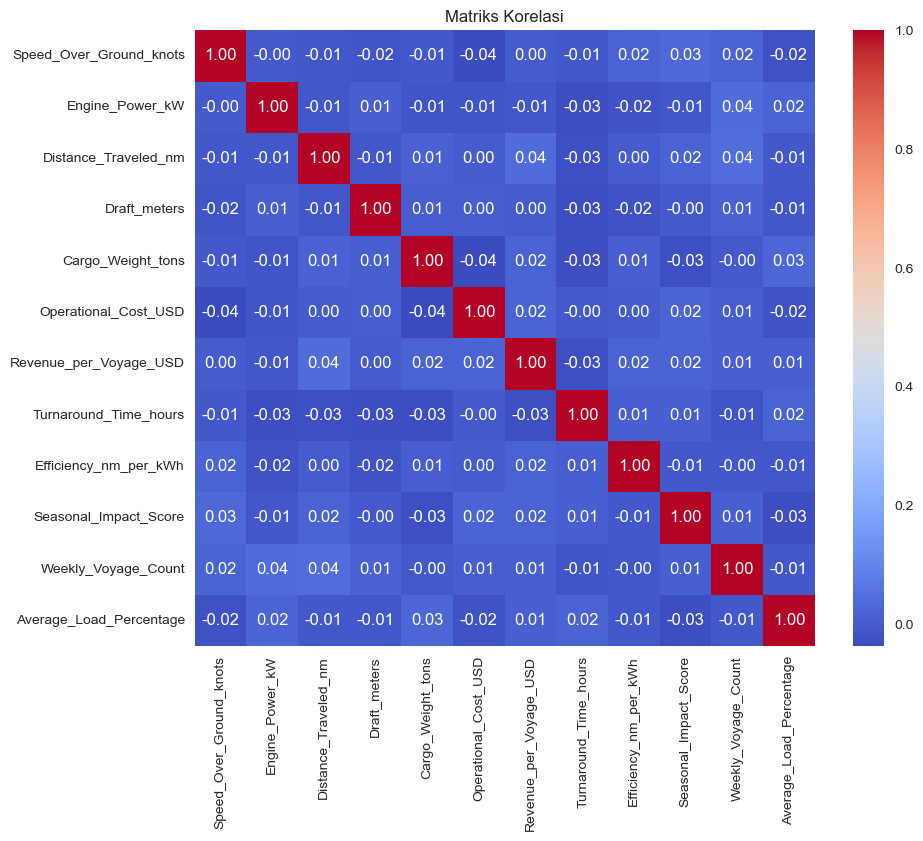

In [7]:
# hubungan antar variabel numerik
df_numerical_cols = df[numerical_cols]
corr = df_numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

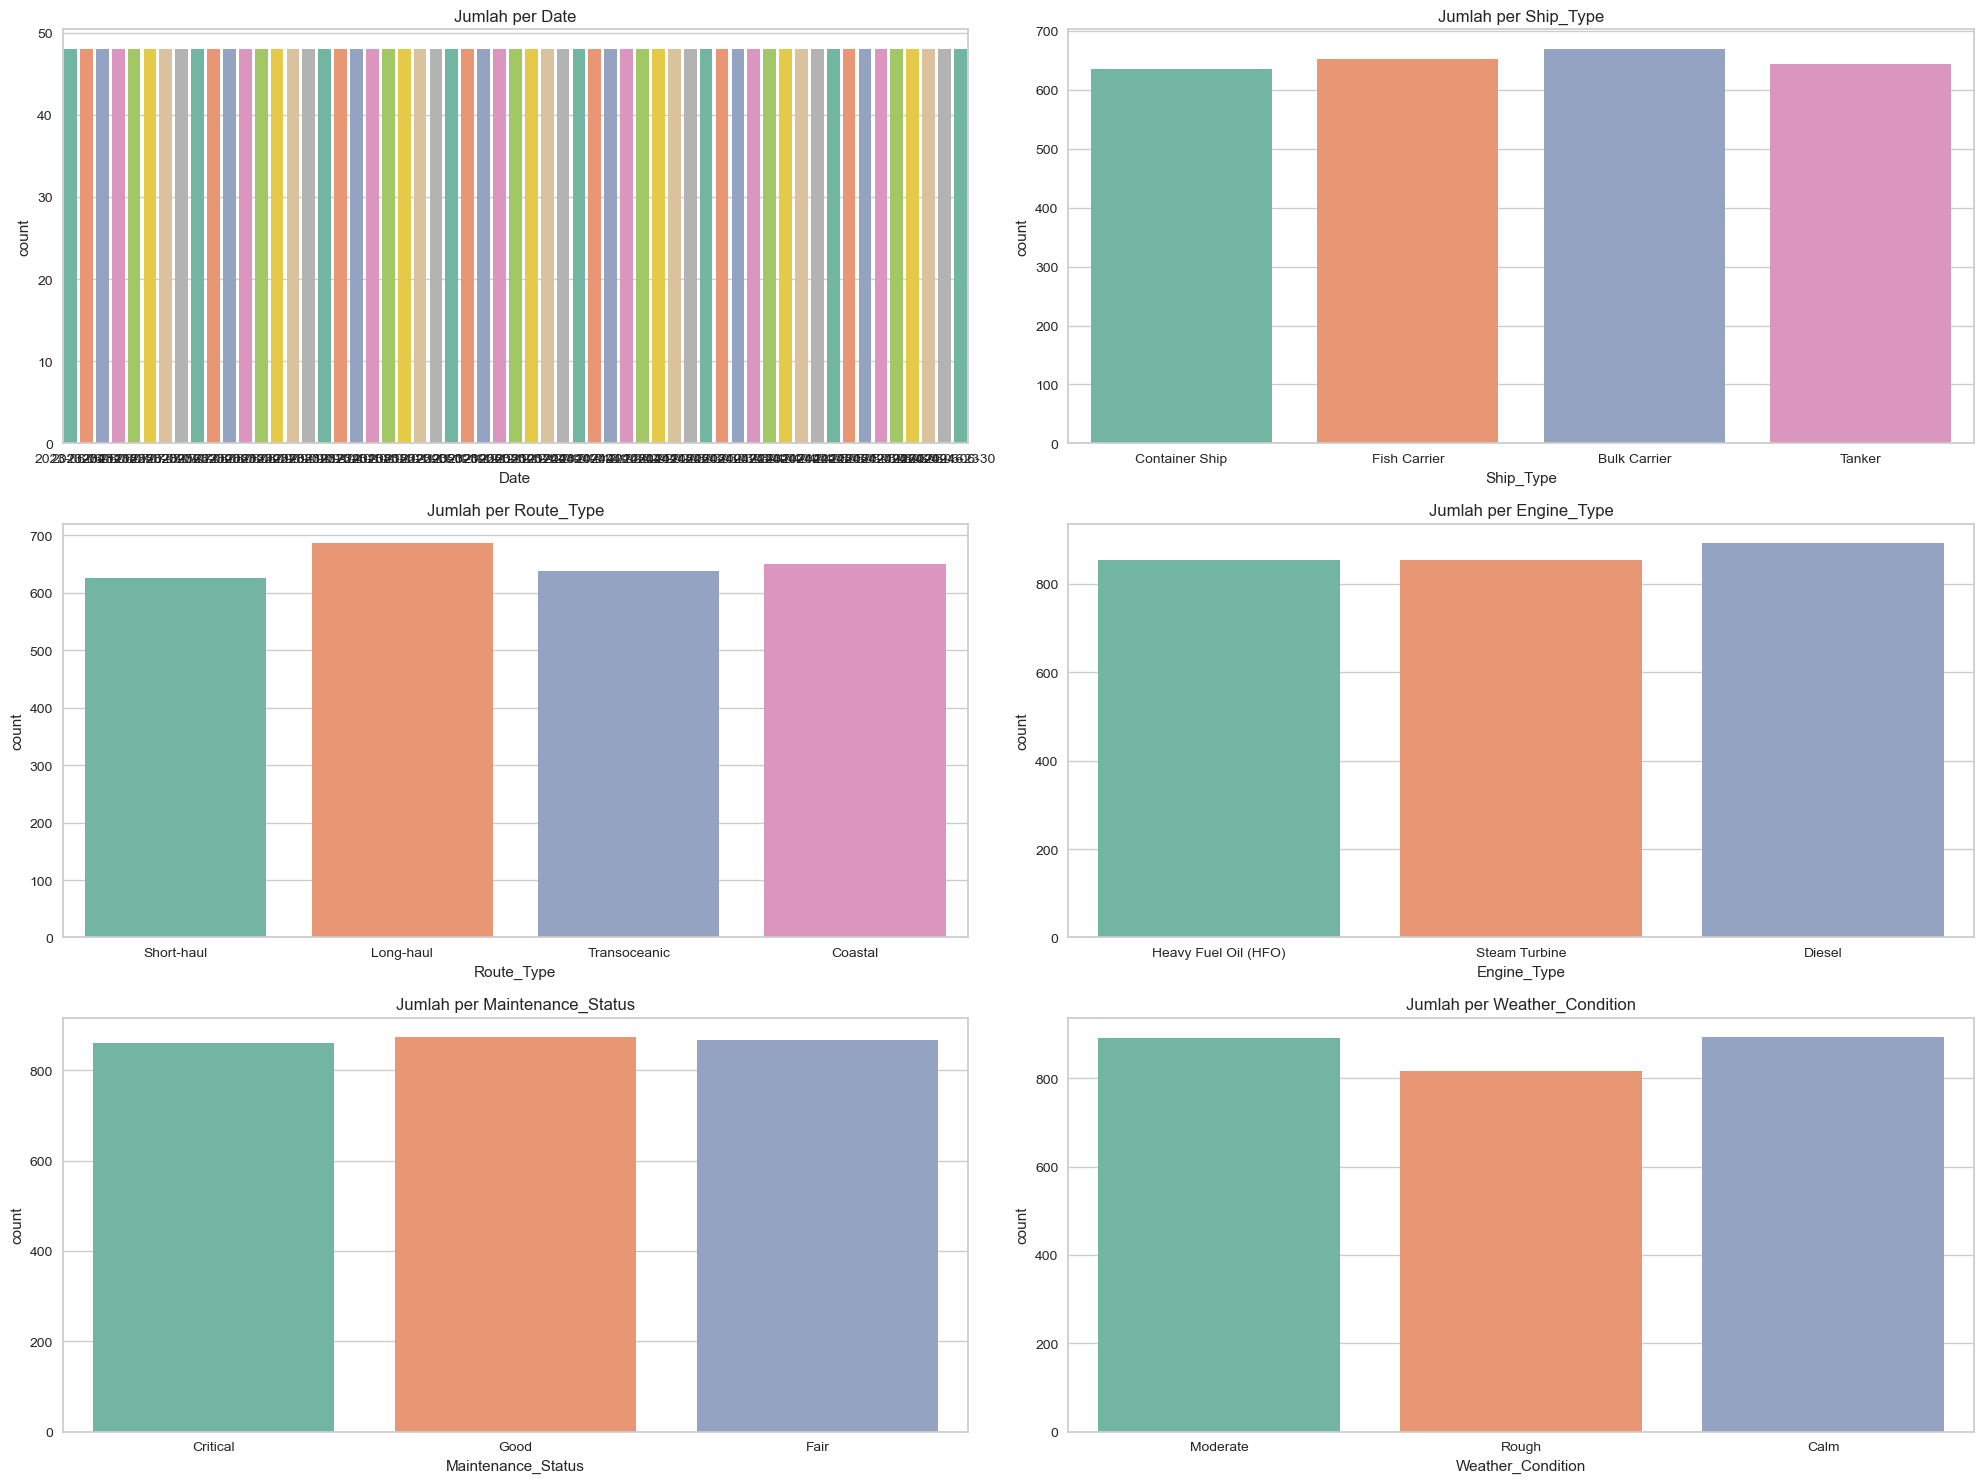

In [8]:
# 4. Visualisasi Data (kategorical)
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1): 
    plt.subplot((len(categorical_cols) + 1) // 2, 2, i) 
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Jumlah per {col}')

plt.tight_layout()
plt.show()

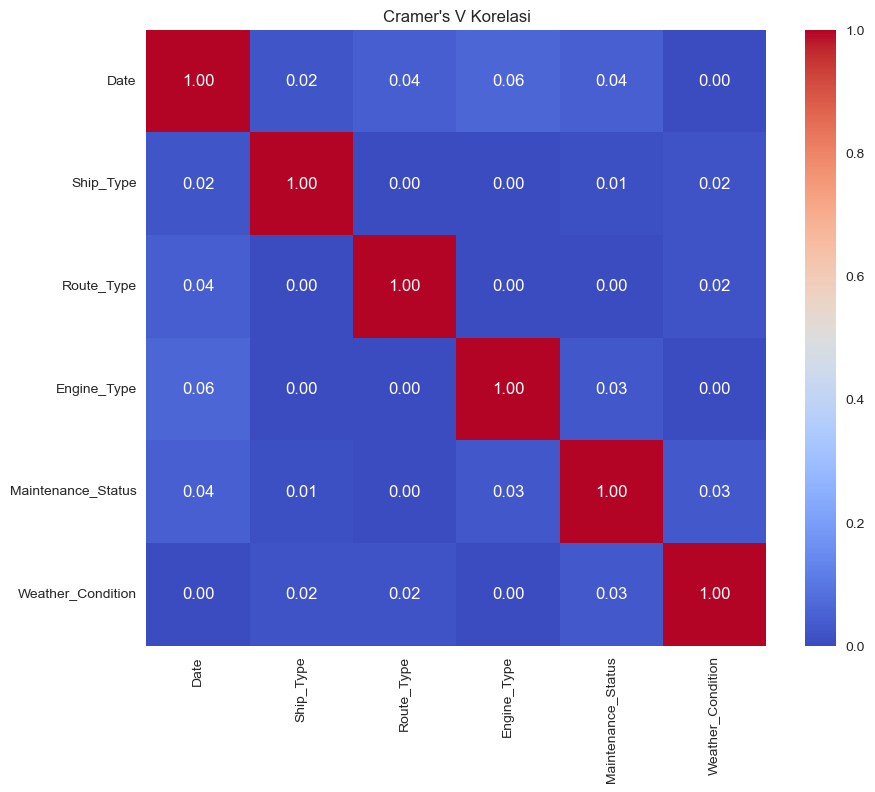

In [9]:
# hubungan antara variabel numerik
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - (r - 1) ** 2 / (n - 1)
    kcorr = k - (k - 1) ** 2 / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), 
                                index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramer's V Korelasi")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# 1. Pemilihan fitur relevan
data = df[['Ship_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Operational_Cost_USD']].copy()
data.head()

,Ship_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD
0,Container Ship,Critical,12.597558,2062.983982,1030.943616,483832.354540
1,Fish Carrier,Good,10.387580,1796.057415,1060.486382,483388.000509
2,Container Ship,Fair,20.749747,1648.556685,658.874144,448543.404044
3,Bulk Carrier,Fair,21.055102,915.261795,1126.822519,261349.605449
4,Fish Carrier,Fair,13.742777,1089.721803,1445.281159,287718.375160


In [11]:
# 2. cek data duplikat
data.duplicated().sum()

0

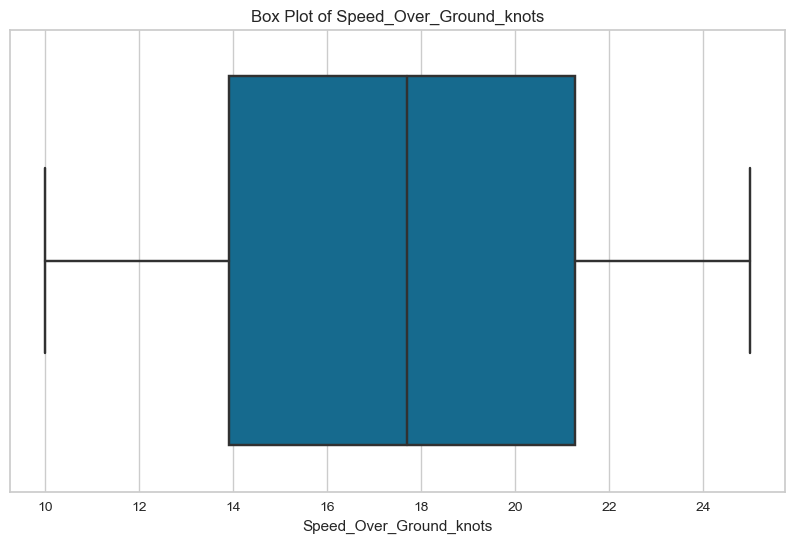

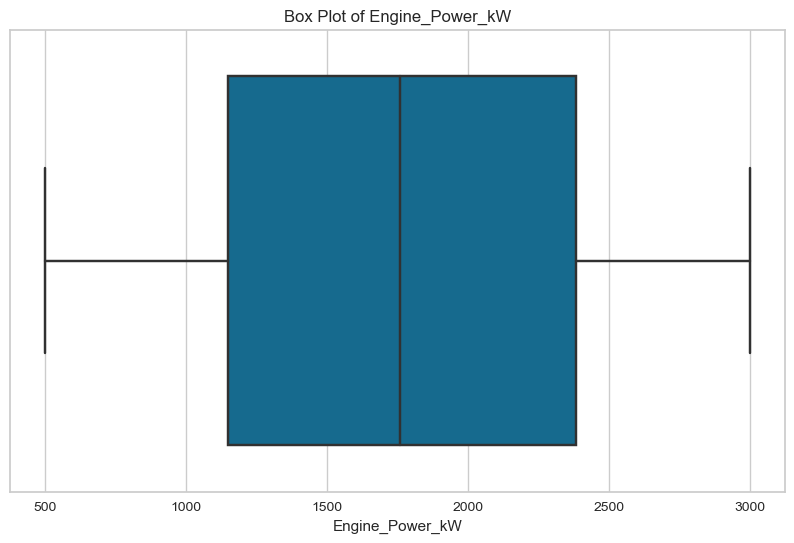

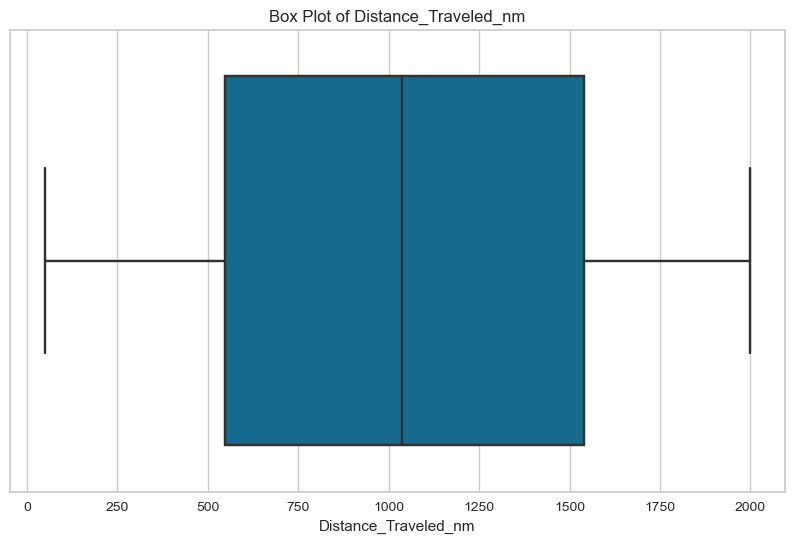

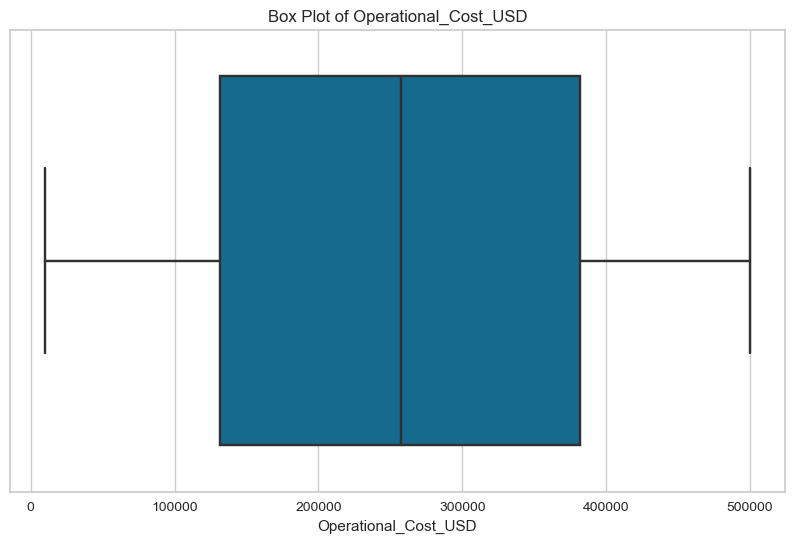

In [12]:
# 3.Deteksi Outlier 
num = data.select_dtypes(include=['number']).columns
for col in num:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [13]:
# menangani missing value
data.dropna(inplace=True)
data.isnull().sum()

Ship_Type                  0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Operational_Cost_USD       0
dtype: int64

In [14]:
# 4. Encoding data kategorikal
encoders = {}
cat = data.select_dtypes(include='object').columns.tolist()
data_encoded = pd.DataFrame()
for col in cat:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder 
data_encoded.head()


,Ship_Type,Maintenance_Status
0,1,0
1,2,2
2,1,1
3,0,1
4,2,1


In [15]:
# 5. Standasrisasi data numerik
num = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num])
data_scaled = pd.DataFrame(data_scaled, columns=num)
data_scaled.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD
0,-1.156658,0.426728,-0.014983,1.620380
1,-1.665773,0.053295,0.037083,1.617224
2,0.721369,-0.153060,-0.670715,1.369739
3,0.791714,-1.178947,0.153993,0.040193
4,-0.892833,-0.934876,0.715242,0.227478


In [16]:
# Menggabungkan data numerik dan kategorikal
data_preprocessing = pd.concat([data_scaled, data_encoded], axis=1)
data_preprocessing.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Ship_Type,Maintenance_Status
0,-1.156658,0.426728,-0.014983,1.620380,1,0
1,-1.665773,0.053295,0.037083,1.617224,2,2
2,0.721369,-0.153060,-0.670715,1.369739,1,1
3,0.791714,-1.178947,0.153993,0.040193,0,1
4,-0.892833,-0.934876,0.715242,0.227478,2,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
# 1. Pemilihan algoritma serta melatih model
k = 8
kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(data_preprocessing)
kmeans_labels = kmeans_model.labels_


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

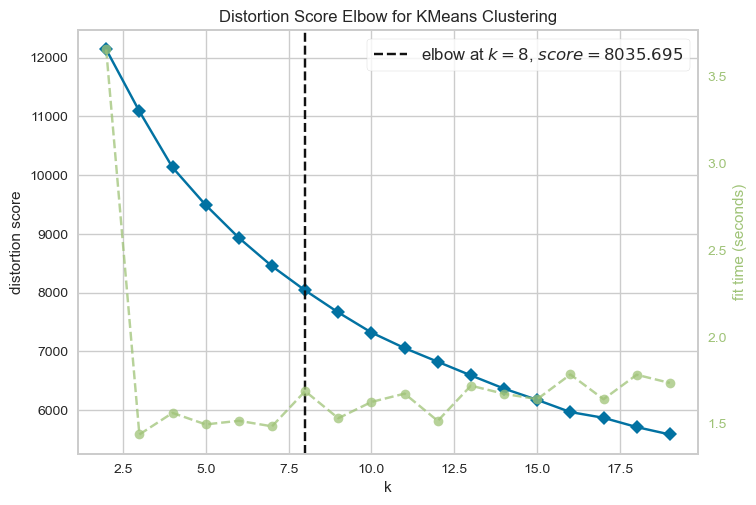

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# 1. Menentukan jumlah cluster dengan metode elbow
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 20), locate_elbow=True)
visualizer.fit(data_preprocessing)
visualizer.show()

Jumlah Cluster: 2, Koefisien Siluet: 0.1648
Jumlah Cluster: 3, Koefisien Siluet: 0.1357
Jumlah Cluster: 4, Koefisien Siluet: 0.1364
Jumlah Cluster: 5, Koefisien Siluet: 0.1313
Jumlah Cluster: 6, Koefisien Siluet: 0.1321
Jumlah Cluster: 7, Koefisien Siluet: 0.1362
Jumlah Cluster: 8, Koefisien Siluet: 0.1371
Jumlah Cluster: 9, Koefisien Siluet: 0.1417
Jumlah Cluster: 10, Koefisien Siluet: 0.1438
Jumlah Cluster: 11, Koefisien Siluet: 0.1442
Jumlah Cluster: 12, Koefisien Siluet: 0.1424
Jumlah Cluster: 13, Koefisien Siluet: 0.1442
Jumlah Cluster: 14, Koefisien Siluet: 0.1487
Jumlah Cluster: 15, Koefisien Siluet: 0.1464
Jumlah Cluster: 16, Koefisien Siluet: 0.1534
Jumlah Cluster: 17, Koefisien Siluet: 0.1488
Jumlah Cluster: 18, Koefisien Siluet: 0.1521
Jumlah Cluster: 19, Koefisien Siluet: 0.1543
Jumlah Cluster: 20, Koefisien Siluet: 0.1508


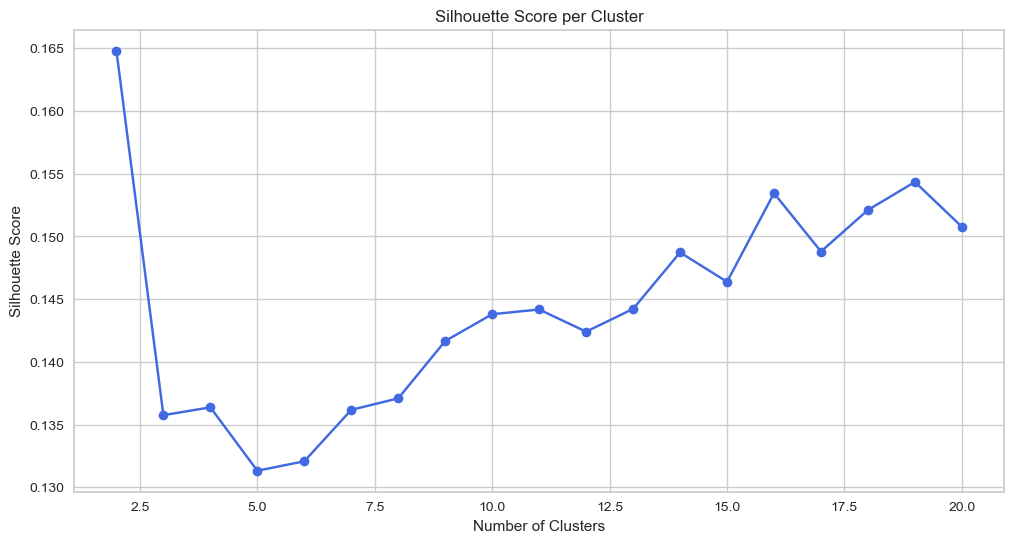

In [18]:
# 2. Analisis Silhouette Score
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans.set_params(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(data_preprocessing)
    sil_score = silhouette_score(data_preprocessing, kmeans_labels, metric='euclidean')
    silhouette_scores.append(sil_score)
    print(f'Jumlah Cluster: {k}, Koefisien Siluet: {sil_score:.4f}')

plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='royalblue')
plt.title('Silhouette Score per Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [20]:
# 3. Menghitung Silhouette Score sebagai ukuran kualitas cluster.
score_before = silhouette_score(data_preprocessing, kmeans_labels)
print("Silhouette Score:", score_before)

Silhouette Score: 0.1301728268491339


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
# 1. menggunakan PCA untuk lebih optimal
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_preprocessing)

In [34]:
# 2. Kombinasi PCA dan UMAP
umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=50)
data_umap = umap.fit_transform(data_pca)
data_umap = pd.DataFrame(data_umap, columns=["UMAP_1", "UMAP_2"])

C:\Users\Hana\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


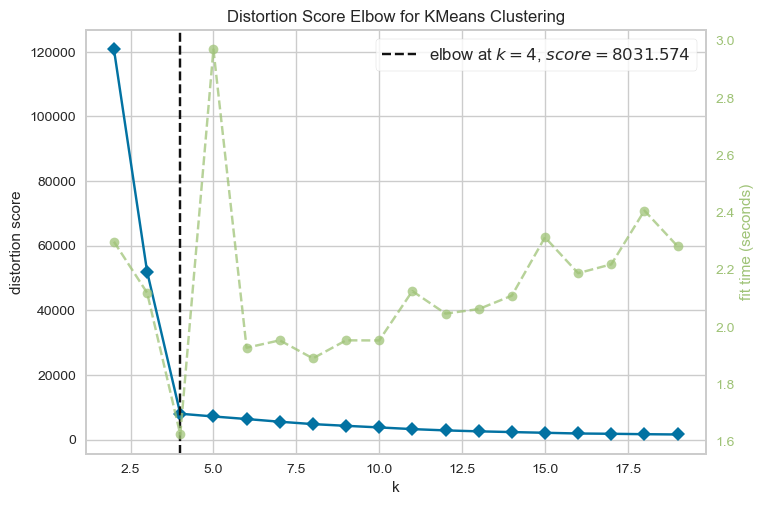

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# mencari jumlah kluster optimal, untuk model setelah proses selection
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 20), locate_elbow=True)
visualizer.fit(data_umap)
visualizer.show()

Jumlah Cluster: 2, Koefisien Siluet: 0.5195
Jumlah Cluster: 3, Koefisien Siluet: 0.6595
Jumlah Cluster: 4, Koefisien Siluet: 0.8162
Jumlah Cluster: 5, Koefisien Siluet: 0.6995
Jumlah Cluster: 6, Koefisien Siluet: 0.5956
Jumlah Cluster: 7, Koefisien Siluet: 0.4786
Jumlah Cluster: 8, Koefisien Siluet: 0.3716
Jumlah Cluster: 9, Koefisien Siluet: 0.3889
Jumlah Cluster: 10, Koefisien Siluet: 0.3980
Jumlah Cluster: 11, Koefisien Siluet: 0.4117
Jumlah Cluster: 12, Koefisien Siluet: 0.4148
Jumlah Cluster: 13, Koefisien Siluet: 0.4202
Jumlah Cluster: 14, Koefisien Siluet: 0.4202
Jumlah Cluster: 15, Koefisien Siluet: 0.4274
Jumlah Cluster: 16, Koefisien Siluet: 0.4273
Jumlah Cluster: 17, Koefisien Siluet: 0.4252
Jumlah Cluster: 18, Koefisien Siluet: 0.4258
Jumlah Cluster: 19, Koefisien Siluet: 0.4199
Jumlah Cluster: 20, Koefisien Siluet: 0.4412


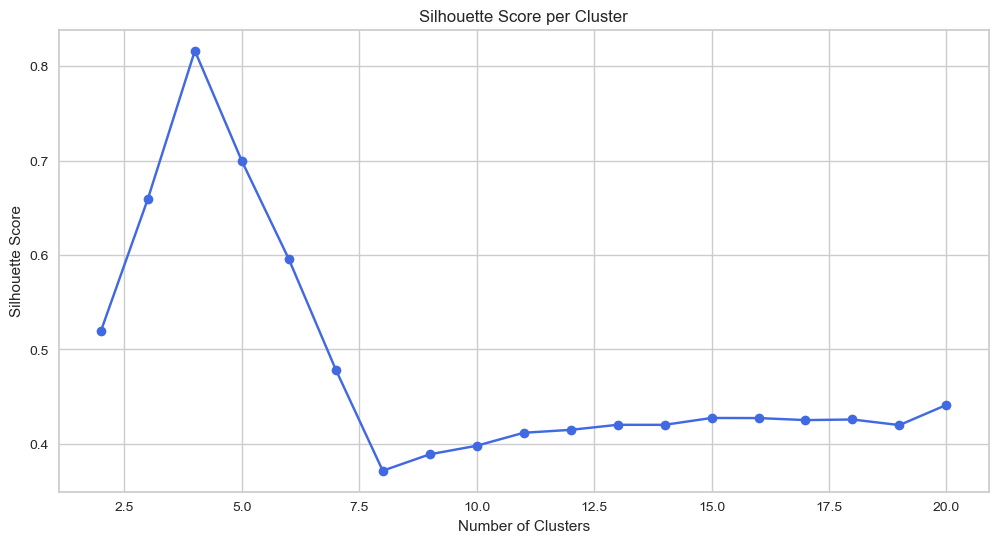

In [36]:
# Analisis Silhouette Score
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans.set_params(n_clusters=k)
    kmeans_labelss= kmeans.fit_predict(data_umap)
    sil_score = silhouette_score(data_umap, kmeans_labelss, metric='euclidean')
    silhouette_scores.append(sil_score)
    print(f'Jumlah Cluster: {k}, Koefisien Siluet: {sil_score:.4f}')

plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='royalblue')
plt.title('Silhouette Score per Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [37]:
# melatih model kedua setelah proses fitur selection
k = 4
kmeans_model_after = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(data_umap)
kmeans_labels_after = kmeans_model_after.labels_
score_after = silhouette_score(data_umap,  kmeans_labels_after)
print("Silhouette Score:", score_after)

Silhouette Score: 0.81623274


In [38]:
# membandingkanscore setelah dan sebelum
print(f"Silhoutte score sebelum fature selection: {score_before:.4f}")
print(f"Silhouette score setelah feature selection: {score_after:.4f}")

Silhoutte score sebelum fature selection: 0.1302
Silhouette score setelah feature selection: 0.8162


In [39]:
# Persebaran data di setiap cluster
pd.Series(kmeans_labels_after).value_counts()

2    634
1    617
0    616
3    604
Name: count, dtype: int64

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

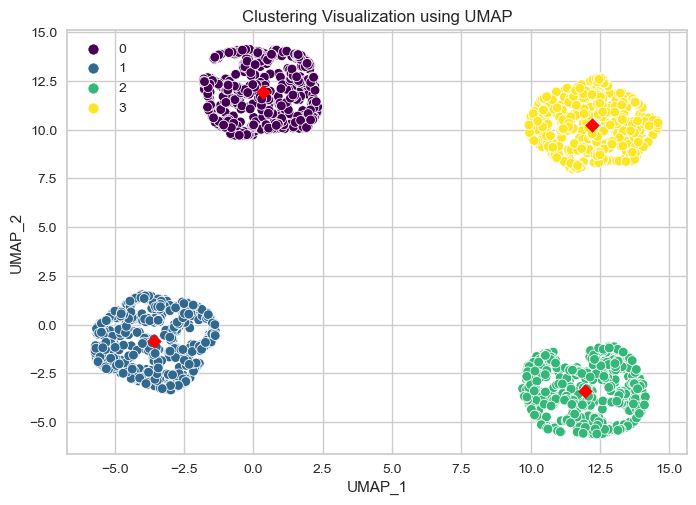

In [40]:
# Visualisasi hasil clustering
sns.scatterplot(x=data_umap["UMAP_1"], y=data_umap["UMAP_2"], hue=kmeans_labels_after , palette='viridis')
plt.title("Clustering Visualization using UMAP")
centroids = kmeans_model_after.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]
plt.scatter(centroids_x, centroids_y, marker='D', color='red', s=50)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [41]:
# Menambahkan fitur 'Cluster' pada data
kmeans_data = data_preprocessing.copy()
kmeans_data['Cluster'] = kmeans_labels_after
kmeans_data.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Ship_Type,Maintenance_Status,Cluster
0,-1.156658,0.426728,-0.014983,1.620380,1,0,3
1,-1.665773,0.053295,0.037083,1.617224,2,2,0
2,0.721369,-0.153060,-0.670715,1.369739,1,1,3
3,0.791714,-1.178947,0.153993,0.040193,0,1,2
4,-0.892833,-0.934876,0.715242,0.227478,2,1,0


In [42]:
# Inverse encoding
for col in cat:
    kmeans_data[col] = encoders[col].inverse_transform(kmeans_data[col])
kmeans_data.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Ship_Type,Maintenance_Status,Cluster
0,-1.156658,0.426728,-0.014983,1.620380,Container Ship,Critical,3
1,-1.665773,0.053295,0.037083,1.617224,Fish Carrier,Good,0
2,0.721369,-0.153060,-0.670715,1.369739,Container Ship,Fair,3
3,0.791714,-1.178947,0.153993,0.040193,Bulk Carrier,Fair,2
4,-0.892833,-0.934876,0.715242,0.227478,Fish Carrier,Fair,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [43]:
# Inverse standarisasi
kmeans_data[num] = scaler.inverse_transform(kmeans_data[num])
kmeans_data.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Ship_Type,Maintenance_Status,Cluster
0,12.597558,2062.983982,1030.943616,483832.354540,Container Ship,Critical,3
1,10.387580,1796.057415,1060.486382,483388.000509,Fish Carrier,Good,0
2,20.749747,1648.556685,658.874144,448543.404044,Container Ship,Fair,3
3,21.055102,915.261795,1126.822519,261349.605449,Bulk Carrier,Fair,2
4,13.742777,1089.721803,1445.281159,287718.375160,Fish Carrier,Fair,0


In [44]:
# Membuat poisisi kategorikal diawal
cols = ['Ship_Type', 'Maintenance_Status'] + [col for col in kmeans_data.columns if col not in ['Ship_Type', 'Maintenance_Status']]
kmeans_data = kmeans_data[cols].loc[:, ~kmeans_data.columns.duplicated()]
kmeans_data.head()

,Ship_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Operational_Cost_USD,Cluster
0,Container Ship,Critical,12.597558,2062.983982,1030.943616,483832.354540,3
1,Fish Carrier,Good,10.387580,1796.057415,1060.486382,483388.000509,0
2,Container Ship,Fair,20.749747,1648.556685,658.874144,448543.404044,3
3,Bulk Carrier,Fair,21.055102,915.261795,1126.822519,261349.605449,2
4,Fish Carrier,Fair,13.742777,1089.721803,1445.281159,287718.375160,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [45]:
agg_numeric = kmeans_data.groupby('Cluster'). agg({
    'Speed_Over_Ground_knots': ['mean', 'min', 'max'],
    'Engine_Power_kW': ['mean', 'min', 'max'],
    'Distance_Traveled_nm': ['mean', 'min', 'max'],
    'Operational_Cost_USD': ['mean', 'min', 'max']
})

agg_categorical = kmeans_data.groupby('Cluster').agg({
    'Ship_Type': lambda x: x.mode()[0],
    'Maintenance_Status': lambda x: x.mode()[0]
})
agg_result = pd.concat ([agg_categorical, agg_numeric], axis=1)
agg_result

,Ship_Type,Maintenance_Status,"(Speed_Over_Ground_knots, mean)","(Speed_Over_Ground_knots, min)","(Speed_Over_Ground_knots, max)","(Engine_Power_kW, mean)","(Engine_Power_kW, min)","(Engine_Power_kW, max)","(Distance_Traveled_nm, mean)","(Distance_Traveled_nm, min)","(Distance_Traveled_nm, max)","(Operational_Cost_USD, mean)","(Operational_Cost_USD, min)","(Operational_Cost_USD, max)"
Cluster,,,,,,,,,,,,,,
0,Fish Carrier,Good,17.378521,10.024793,24.997043,1759.828031,502.106023,2998.657159,1044.933793,52.566168,1996.830088,254955.847329,10189.004697,498578.613626
1,Tanker,Fair,17.842219,10.093752,24.977582,1788.618705,508.540669,2995.549644,1057.960918,50.524214,1995.052155,252099.744487,10092.306318,499710.905931
2,Bulk Carrier,Fair,17.725138,10.009756,24.991661,1748.547921,501.739027,2995.244509,1001.764157,52.286608,1998.337057,254490.583875,11376.005609,498862.216183
3,Container Ship,Critical,17.522405,10.058610,24.916506,1734.625750,504.481114,2998.734329,1054.486475,50.433150,1998.035422,261367.754042,10097.439656,499734.867868


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

Berdasarkan hasil clustering menggunakan model KMeans, didapatkan empat cluster dengan karakteristik utama sebagai berikut:  

## Cluster 0:
- *Ship Type* yang dominan adalah **Fish Carrier** dengan status pemeliharaan **Good**.  
- Rata-rata kecepatan kapal (*Speed Over Ground*) sekitar **17 knots**, dengan rentang antara **10 hingga 25 knots**.  
- *Engine Power* memiliki rata-rata **1760 kW**, dengan nilai minimum **502 kW** dan maksimum **2999 kW**.  
- Jarak tempuh kapal rata-rata **1045 nm**, dengan rentang antara **53 hingga 1997 nm**.  
- Biaya operasional rata-rata mencapai **USD 254,956**, dengan rentang dari **USD 10,189 hingga 498,579**.  
**Analisis:**  
Cluster ini cenderung diisi oleh kapal-kapal pengangkut ikan (*Fish Carrier*) yang memiliki kondisi pemeliharaan **baik** (*Good*). Kecepatan dan daya mesin yang relatif stabil dengan biaya operasional menengah menunjukkan bahwa kapal-kapal ini mungkin beroperasi dalam perjalanan jarak menengah hingga jauh, namun tetap menjaga kondisi mesin dengan cukup baik.  

## Cluster 1:
- *Ship Type* yang dominan adalah **Tanker** dengan status pemeliharaan **Fair**.  
- Rata-rata kecepatan kapal sekitar **18 knots**, dengan rentang **10 hingga 25 knots**.  
- *Engine Power* memiliki rata-rata **1789 kW**, dengan nilai minimum **508 kW** dan maksimum **2995 kW**.  
- Jarak tempuh rata-rata **1058 nm**, dengan rentang **50 hingga 1995 nm**.  
- Biaya operasional rata-rata sebesar **USD 252,100**, dengan rentang **USD 10,092 hingga 499,711**.  
**Analisis:**  
Cluster ini menunjukkan kapal jenis **Tanker** yang memiliki status pemeliharaan **sedang** (*Fair*). Biaya operasional yang sedikit lebih rendah dibandingkan Cluster 0, meskipun daya mesin dan jarak tempuhnya mirip, bisa mengindikasikan pola penggunaan bahan bakar yang lebih efisien atau jalur operasi yang lebih optimal. Namun, status pemeliharaan **Fair** menunjukkan perlunya perhatian lebih dalam menjaga performa kapal.  

## Cluster 2:
- *Ship Type* yang dominan adalah **Bulk Carrier** dengan status pemeliharaan **Fair**.  
- Rata-rata kecepatan kapal sekitar **18 knots**, dengan rentang **10 hingga 25 knots**.  
- *Engine Power* memiliki rata-rata **1748 kW**, dengan nilai minimum **502 kW** dan maksimum **2995 kW**.  
- Jarak tempuh rata-rata **1002 nm**, dengan rentang **52 hingga 1998 nm**.  
- Biaya operasional rata-rata sebesar **USD 254,491**, dengan rentang **USD 11,376 hingga 498,862**.  
**Analisis:**  
Cluster ini memiliki karakteristik mirip dengan Cluster 1, namun dengan jenis kapal **Bulk Carrier** dan jarak tempuh yang sedikit lebih pendek. Biaya operasional yang hampir sama mengindikasikan bahwa meskipun jarak tempuh lebih pendek, biaya bahan bakar atau pemeliharaan mungkin lebih tinggi. Status pemeliharaan **Fair** juga menunjukkan bahwa kapal dalam cluster ini memerlukan pemantauan rutin.  

## Cluster 3:
- *Ship Type* yang dominan adalah **Container Ship** dengan status pemeliharaan **Critical**.  
- Rata-rata kecepatan kapal sekitar **17 knots**, dengan rentang **10 hingga 25 knots**.  
- *Engine Power* memiliki rata-rata **1735 kW**, dengan nilai minimum **504 kW** dan maksimum **2999 kW**.  
- Jarak tempuh rata-rata **1054 nm**, dengan rentang **50 hingga 1998 nm**.  
- Biaya operasional rata-rata sebesar **USD 261,368**, dengan rentang **USD 10,097 hingga 497,735**.  
**Analisis:**  
Cluster ini menyoroti kapal **Container Ship** yang memiliki status pemeliharaan **kritis** (*Critical*), yang mengindikasikan adanya risiko tinggi terkait performa dan keamanan kapal. Biaya operasional yang lebih tinggi dibanding cluster lainnya mungkin disebabkan oleh kebutuhan pemeliharaan mendesak atau konsumsi bahan bakar yang kurang efisien. Ini menunjukkan perlunya perhatian khusus untuk perbaikan dan optimasi operasional kapal di cluster ini.  

---

**Kesimpulan:**  
1. **Perbedaan Biaya Operasional:** Cluster 3 memiliki biaya operasional tertinggi, yang kemungkinan disebabkan oleh kondisi pemeliharaan yang **kritis** dan jenis kapal **Container Ship** yang membutuhkan penanganan khusus.  
2. **Kondisi Pemeliharaan:** Sebagian besar kapal dengan status pemeliharaan **Fair** berada di Cluster 1 dan 2, yang mungkin memerlukan pemeriksaan berkala agar tidak mengalami penurunan performa seperti Cluster 3.  
3. **Efisiensi Operasional:** Cluster 1 dan 2 menunjukkan pola biaya operasional yang mirip, meskipun dengan perbedaan pada jenis kapal dan jarak tempuh, yang dapat menjadi indikator efisiensi operasional di kapal **Tanker** dan **Bulk Carrier**.  
4. **Rekomendasi:** Kapal di Cluster 3 membutuhkan perhatian khusus untuk menurunkan biaya operasional dan memperbaiki status pemeliharaan, sementara kapal di Cluster 0 bisa dijadikan contoh operasional yang lebih stabil.  

# Analysis of Cluster Characteristics from the KMeans Model

The following is an analysis of the characteristics of each cluster generated by the KMeans model.

Based on the clustering results using the KMeans model, four clusters were identified with the following key characteristics:

## Cluster 0:
- The dominant *Ship Type* is **Fish** Carrier with a maintenance status of **Good**.
- The average *Speed Over Ground* is approximately **17 knots**, ranging between **10 and 25 knots**.
- The *Engine Power* has an average of **1,760 kW**, with a minimum value of **502 kW** and a maximum of **2,999 kW**.
- The average distance traveled is **1,045 nm**, with a range between **53 and 1,997 nm**.
- The average operational cost is **USD 254,956**, with a range from **USD 10,189 to USD 498,579**.</br>
**Analisis:**  
This cluster is primarily composed of Fish Carriers that are well-maintained (Good status). The relatively stable speed and engine power, along with moderate operational costs, suggest that these vessels operate on medium to long-distance routes while maintaining their engine condition effectively.

## Cluster 1:
- The dominant *Ship Type* is **Tanker** with a maintenance status of **Fair**.
- The average *Speed Over Ground* is approximately **18 knots**, ranging between **10 and 25 knots**.
- The *Engine Power* has an average of **1,789 kW**, with a minimum value of **508 kW** and a maximum of **2,995 kW**.
- The average distance traveled is **1,058 nm**, with a range between **50 and 1,995 nm**.
- The average operational cost is **USD 252,100**, with a range from **USD 10,092 to USD 499,711**.</br>
**Analysis:**
This cluster consists of Tankers with a Fair maintenance status. The slightly lower operational cost compared to Cluster 0, despite having similar engine power and travel distances, may indicate more efficient fuel usage or optimized operational routes. However, the Fair maintenance status suggests that these ships require greater attention to maintain performance.

## Cluster 2:
- The dominant *Ship Type* is **Bulk Carrier** with a maintenance status of **Fair**.
- The average *Speed Over Ground* is approximately **18 knots**, ranging between **10 and 25 knots**.
- The *Engine Power* has an average of **1,748 kW**, with a minimum value of **502 kW** and a maximum of **2,995 kW**.
- The average distance traveled is **1,002 nm,** with a range between **52 and 1,998 nm**.
- The average operational cost is **USD 254,491**, with a range from **USD 11,376 to USD 498,862**.</br>
**Analysis:**
This cluster shares similar characteristics with Cluster 1, but the ship type is Bulk Carrier, and the travel distance is slightly shorter. The almost identical operational cost suggests that, despite the shorter travel distance, the fuel or maintenance expenses may be higher. The Fair maintenance status indicates that these vessels require regular monitoring to ensure performance.

## Cluster 3:
- The dominant *Ship Type* is **Container Ship** with a maintenance status of **Critical**.
- The average *Speed Over Ground* is approximately **17 knots**, ranging between **10 and 25 knots**.
- The *Engine Power* has an average of **1,735 kW**, with a minimum value of **504 kW** and a maximum of **2,999 kW**.
- The average distance traveled is **1,054 nm**, with a range between **50 and 1,998 nm**.
- The average operational cost is **USD 261,368**, with a range from **USD 10,097 to USD 497,735**.</br>
**Analysis:**
This cluster highlights Container Ships with a Critical maintenance status, indicating a high risk in terms of performance and safety. The higher operational costs compared to other clusters could be due to urgent maintenance requirements or less efficient fuel consumption. This suggests a need for immediate repairs and operational optimizations for vessels in this cluster.

---
**Conclusion:**
1. **Operational Cost Differences:** Cluster 3 has the highest operational cost, likely due to its critical maintenance condition and the Container Ship type, which requires specialized handling.

2. **Maintenance Condition:** Most ships with a Fair maintenance status are in Cluster 1 and 2, which may require regular inspections to prevent performance decline similar to Cluster 3.

3. **Operational Efficiency:** Cluster 1 and 2 exhibit similar operational cost patterns, despite differences in ship type and travel distance, indicating operational efficiency in Tanker and Bulk Carrier ships.

4. **Recommendations:** Ships in Cluster 3 require special attention to reduce operational costs and improve maintenance status, while ships in Cluster 0 can serve as an example of a more stable operational model.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [47]:
kmeans_data.to_csv('dataset_clustering.csv', index=False)
print("Dataset berhasil disimpan")

Dataset berhasil disimpan
